<a href="https://colab.research.google.com/github/dangiotto/Python_Mercado_Financeiro/blob/master/BCB%20Expectativas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install python-bcb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00


In [2]:
from bcb import Expectativas

In [11]:
em = Expectativas()

In [12]:
em.describe()

EntitySets:
  ExpectativasMercadoTop5Anuais
  ExpectativaMercadoMensais
  ExpectativasMercadoInflacao24Meses
  ExpectativasMercadoInflacao12Meses
  ExpectativasMercadoSelic
  ExpectativasMercadoTop5Selic
  ExpectativasMercadoTop5Mensais
  ExpectativasMercadoTrimestrais
  ExpectativasMercadoAnuais


In [13]:
ep = em.get_endpoint('ExpectativasMercadoAnuais')

##Indicadores

Balança Comercial / Câmbio / Conta corrente / Dívida bruta do governo geral / Dívida líquida do setor público / IGP-DI / IGP-M / INPC / Investimento direto no país / IPA-DI / IPA-M / IPCA / IPCA Administrados / IPCA Alimentação no domicílio / IPCA Bens industrializados / IPCA Livres / IPCA Serviços / IPCA-15 / IPC-FIPE / PIB Agropecuária / PIB Despesa de consumo da administração pública/ PIB despesa de consumo das famílias/ PIB Exportação de bens e serviços / PIB Formação Bruta de Capital Fixo / PIB Importação de bens e serviços / PIB Indústria / PIB Serviços / PIB Total/ Produção industrial / Resultado nominal / Resultado primário / Selic / Taxa de desocupação

**(Se indicador Balança Comercial -> Exportações / Importações / Saldo)**


In [34]:
def get_previsoes(indicador, ano):
  return (ep.query()
    .filter(ep.Indicador == f'{indicador}')
    .filter(ep.Data >= f'{ano}-01-01')
    .filter(ep.DataReferencia == ano)
    .select(ep.Data, ep.Mediana)
    .collect())

In [36]:
cambio = get_previsoes('Câmbio', 2024)

In [39]:
cambio.tail()

,Data,Mediana
175,2024-05-08,5.0100
176,2024-05-09,5.0052
177,2024-05-09,5.0100
178,2024-05-10,5.0003
179,2024-05-10,5.0200


In [41]:
cambio = cambio.set_index('Data')

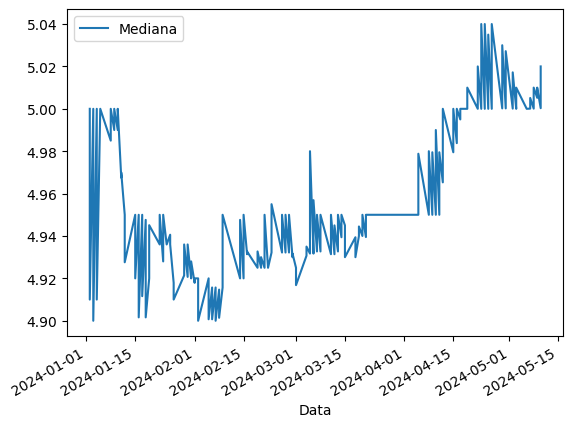

In [44]:
cambio.plot();